In [1]:
# MNISTデータセットを取得
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist
# DESCR データセットの説明
# data インスタンスごとに１行、特徴量毎に１列の配列
# target ラベルの配列を格納


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
# MNISTデータを分割
X, y = mnist["data"],mnist["target"]
# Xに訓練データをyにラベルデータを格納

In [3]:
X.shape
# 70000行で特徴量784の行列(28x28=784)

(70000, 784)

In [4]:
y.shape
# 70000行のラベルデータ

(70000,)

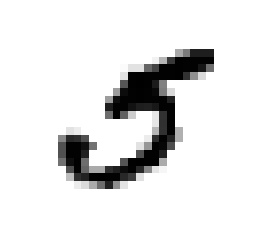

In [5]:
# サンプルデータの抽出
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000] #36000個目のデータを抽出
some_digit_image = some_digit.reshape(28,28) # 28x28の配列に変換

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
# cm.binary 色指定
# interpolation = "nearest" 描画をタイル状に表示
plt.axis("off") 
# 28x28 のグラフ上に表示するかを設定 offはイメージだけ表示
plt.show()

In [6]:
y[36000]
# 36000行目のラベルは何ですか？

5.0

In [7]:
# MNISTのデータを訓練用と検証用に分割。ラベルデータもあるので訓練データに対応する形で分割
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# X_train : 1～60000の訓練用データ
# X_test : 60000～LASTまでの検証用データ 
# y_train : 1～60000のラベルデータ X_trainと対応する
# y_test : 60000～LASTまでの検証用データ X_testと対応する


In [8]:
# 訓練データとそのラベルをシャッフル
import numpy as np
shuffle_index = np.random.permutation(60000)
# shuffle_index に 60000のintを渡している = 0～60000データ分のランダム値を作成
# つまり　permutation(5) = permutation(list(range(5)))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # 60000行分のランダム値でシャッフル


In [9]:
# 二項分類機の訓練
# 1個の数字だけを分類する機能を実装してみる
# 5に対してみはtrue,それ以外はfalse

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
# SGD 確率的勾配降下法
# オンライン学習に向いている
# 非常に大きなデータも扱える
# SGDは訓練の無作為性に依存するため結果際限のためにはrandom_stateパラメータの設定が必要
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)  # 訓練の特徴量データにX_trainの60000件、ラベルデータにy_train_5　という5にだけ true が入ったデータ

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=-inf, verbose=0, warm_start=False)

In [11]:
# 
sgd_clf.predict([some_digit]) # 36000個めのデータを例に分類ができているか確認


array([ True])